In [1]:
import glossary_eval
import imp
imp.reload(glossary_eval)
from scipy.stats import ttest_ind, pearsonr
import matplotlib.pyplot as plt
import os
import csv
from collections import defaultdict, Counter
import tqdm
import numpy as np
import matplotlib as mpl
from scipy.stats import mannwhitneyu
mpl.rcParams['figure.dpi'] = 300
import pandas as pd

/mnt/data0/lucy/anaconda3/envs/bert/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/mnt/data0/lucy/anaconda3/envs/bert/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/mnt/data0/lucy/anaconda3/envs/bert/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/mnt/data0/lucy/anaconda3/envs/bert/lib/pyt

In [2]:
ROOT = '/mnt/data0/lucy/ingroup_lang/'
LOG_DIR = ROOT + 'logs/' 
SENSE_PMI_DIR = LOG_DIR + 'finetuned_sense_pmi/'
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_sense_pmi/'
AG_SENSE_PMI_DIR = LOG_DIR + 'ag_sense_pmi/'
DN_SENSE_PMI_DIR = LOG_DIR + 'denoised_sense_pmi/'
TYPE_PMI_DIR = LOG_DIR + 'pmi/'
TFIDF_DIR = LOG_DIR + 'tfidf/'

In [3]:
sr2terms = glossary_eval.get_sr2terms()

## Base Sense PMI

### most common sense npmi

100%|██████████| 474/474 [00:00<00:00, 772.75it/s]


807
194700
Ttest_indResult(statistic=48.26399806324368, pvalue=0.0)
MannwhitneyuResult(statistic=126782134.0, pvalue=7.582720221781659e-200)
0.13038452924830177
0.0208046849863509


Text(0.5, 0, 'most common sense npmi')

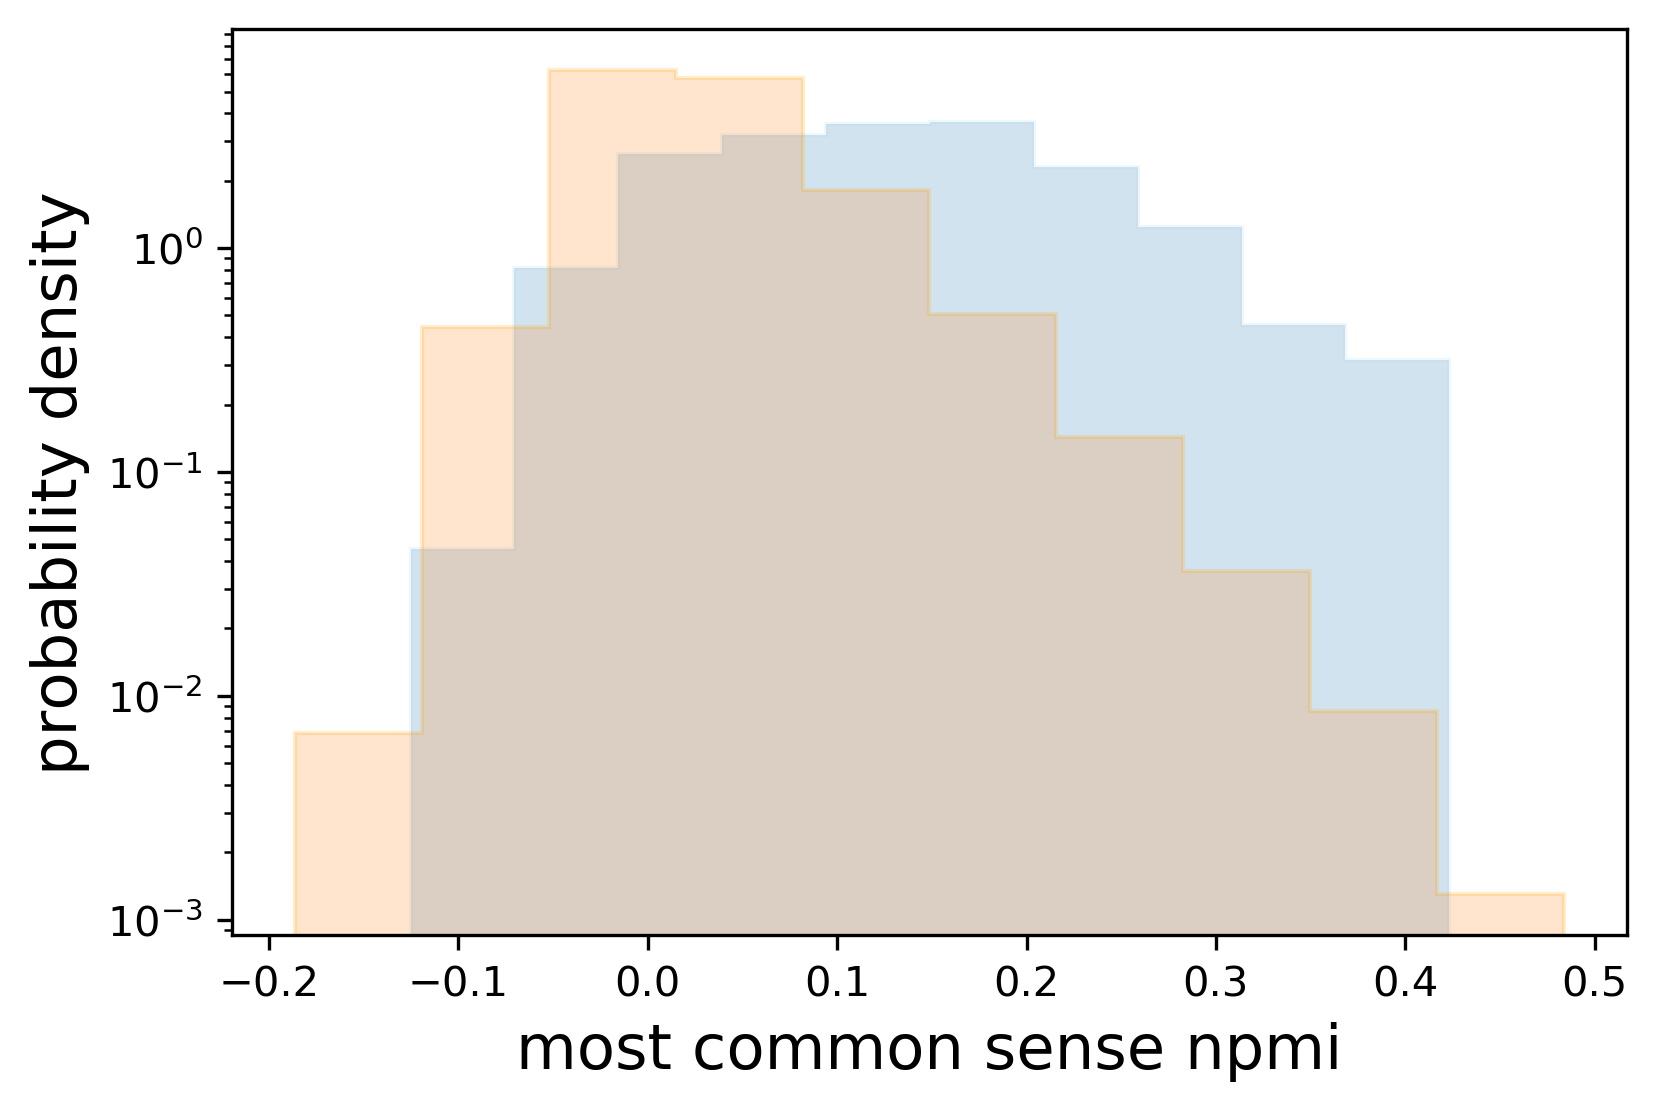

In [7]:
# sense_pmi of most common sense of a word
BASE_MOST_PMI = LOG_DIR + 'base_most_sense_pmi/'
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(BASE_MOST_PMI))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(BASE_MOST_PMI + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['most_pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)
print(len(gloss_vals))
print(len(not_gloss_vals))
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('probability density', fontsize=15)
plt.xlabel('most common sense npmi', fontsize=15)

### Compare most_pmi with max_pmi for BERT embeddings

In [5]:
# compare most_pmi with max_pmi
BASE_MAX_PMI = LOG_DIR + 'base_max_sense_pmi/'
x = []
y = []
words = []
for filename in tqdm.tqdm(sorted(os.listdir(BASE_MOST_PMI))): 
    subreddit = filename.replace('.csv', '')
    df1 = pd.read_csv(BASE_MAX_PMI + filename, encoding='utf-8').fillna('')
    df2 = pd.read_csv(BASE_MOST_PMI + filename, encoding='utf-8').fillna('')
    assert(len(df1) == len(df2))
    df3 = pd.merge(df1, df2, on='word')
    words.extend(df3['word'].tolist())
    x.extend(df3['max_pmi'].tolist())
    y.extend(df3['most_pmi'].tolist())
print("Pearson r:", pearsonr(x, y))

100%|██████████| 474/474 [00:08<00:00, 57.12it/s]


Pearson r: (0.9458587375042024, 0.0)


## Substitute PMI

### most common sense npmi

100%|██████████| 474/474 [00:00<00:00, 762.14it/s]


Ttest_indResult(statistic=45.92216884504068, pvalue=0.0)
MannwhitneyuResult(statistic=125728670.0, pvalue=2.5907068275406052e-191)
0.11646660607011185
0.014338323325278145


Text(0.5, 0, 'most common sense pmi')

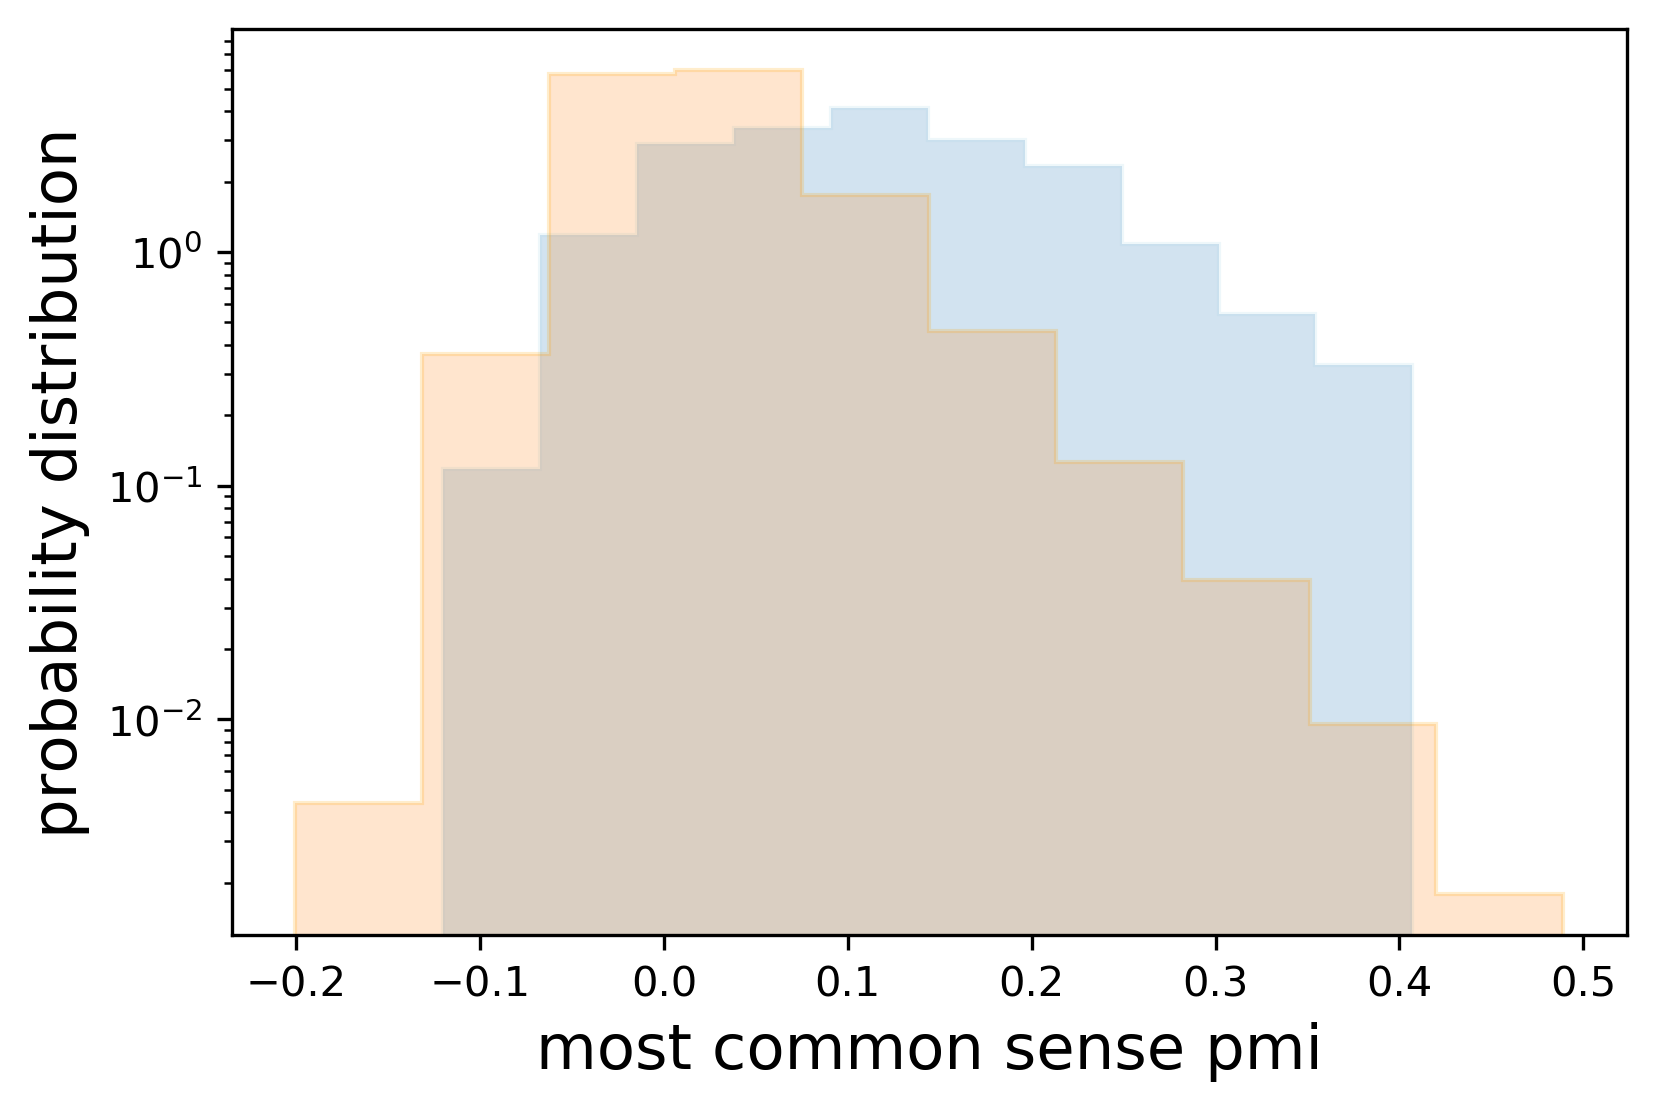

In [25]:
# sense_pmi of most common sense of a word
AG_MOST_PMI = LOG_DIR + 'ag_most_sense_pmi/'
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(AG_MOST_PMI))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(AG_MOST_PMI + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['most_pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('probability distribution', fontsize=15)
plt.xlabel('most common sense pmi', fontsize=15)

### compare subsitute-based method with embedding-based method

100%|██████████| 474/474 [00:07<00:00, 62.61it/s]


Pearson r: (0.9206915345881291, 0.0)


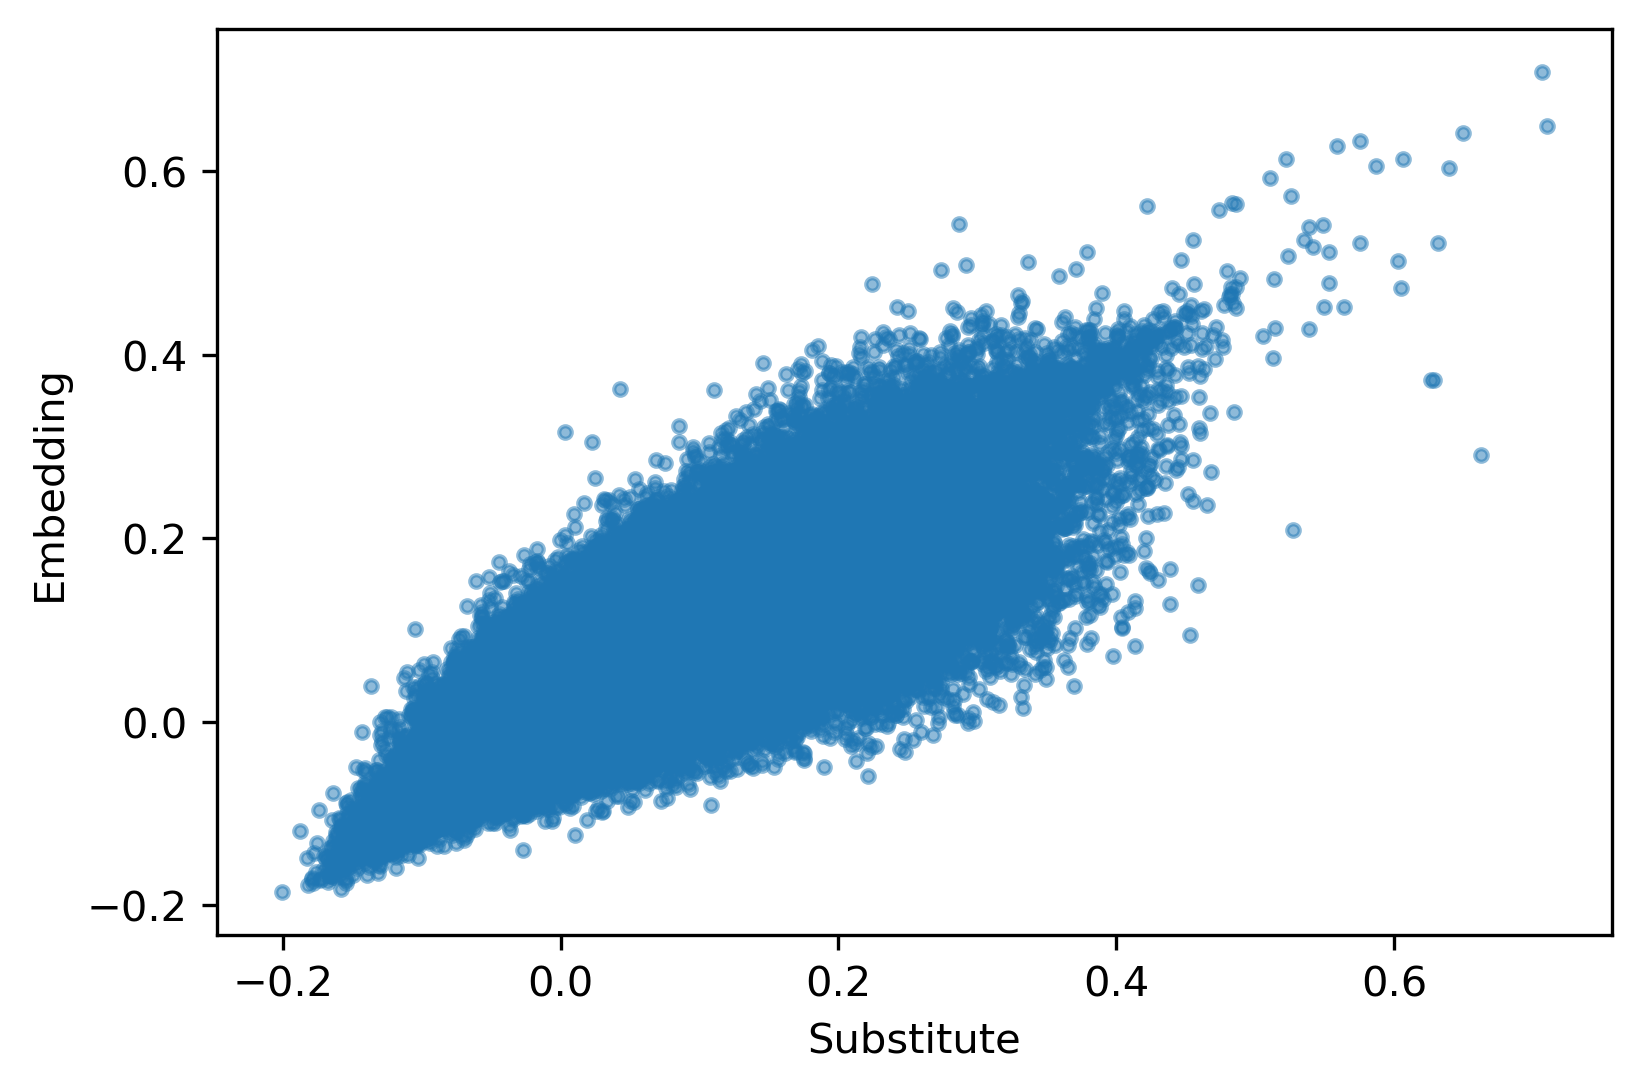

In [6]:
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_most_sense_pmi/'
AG_SENSE_PMI_DIR = LOG_DIR + 'ag_most_sense_pmi/'
x = []
y = []
for filename in tqdm.tqdm(sorted(os.listdir(AG_SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    df1 = pd.read_csv(AG_SENSE_PMI_DIR + filename)
    df2 = pd.read_csv(BASE_SENSE_PMI_DIR + filename)
    assert(len(df1) == len(df2))
    df3 = pd.merge(df1, df2, on='word')
    x.extend(df3['most_pmi_x'].tolist())
    y.extend(df3['most_pmi_y'].tolist())
print("Pearson r:", pearsonr(x, y))
plt.scatter(x, y, alpha=0.5, marker = '.')
plt.xlabel("Substitute")
plt.ylabel("Embedding")
plt.show()

## Type PMI

100%|██████████| 474/474 [00:01<00:00, 339.62it/s]


2184
431773
Ttest_indResult(statistic=74.34385215831978, pvalue=0.0)
MannwhitneyuResult(statistic=781729601.0, pvalue=0.0)
2.7539354583977698
0.20878454230275614


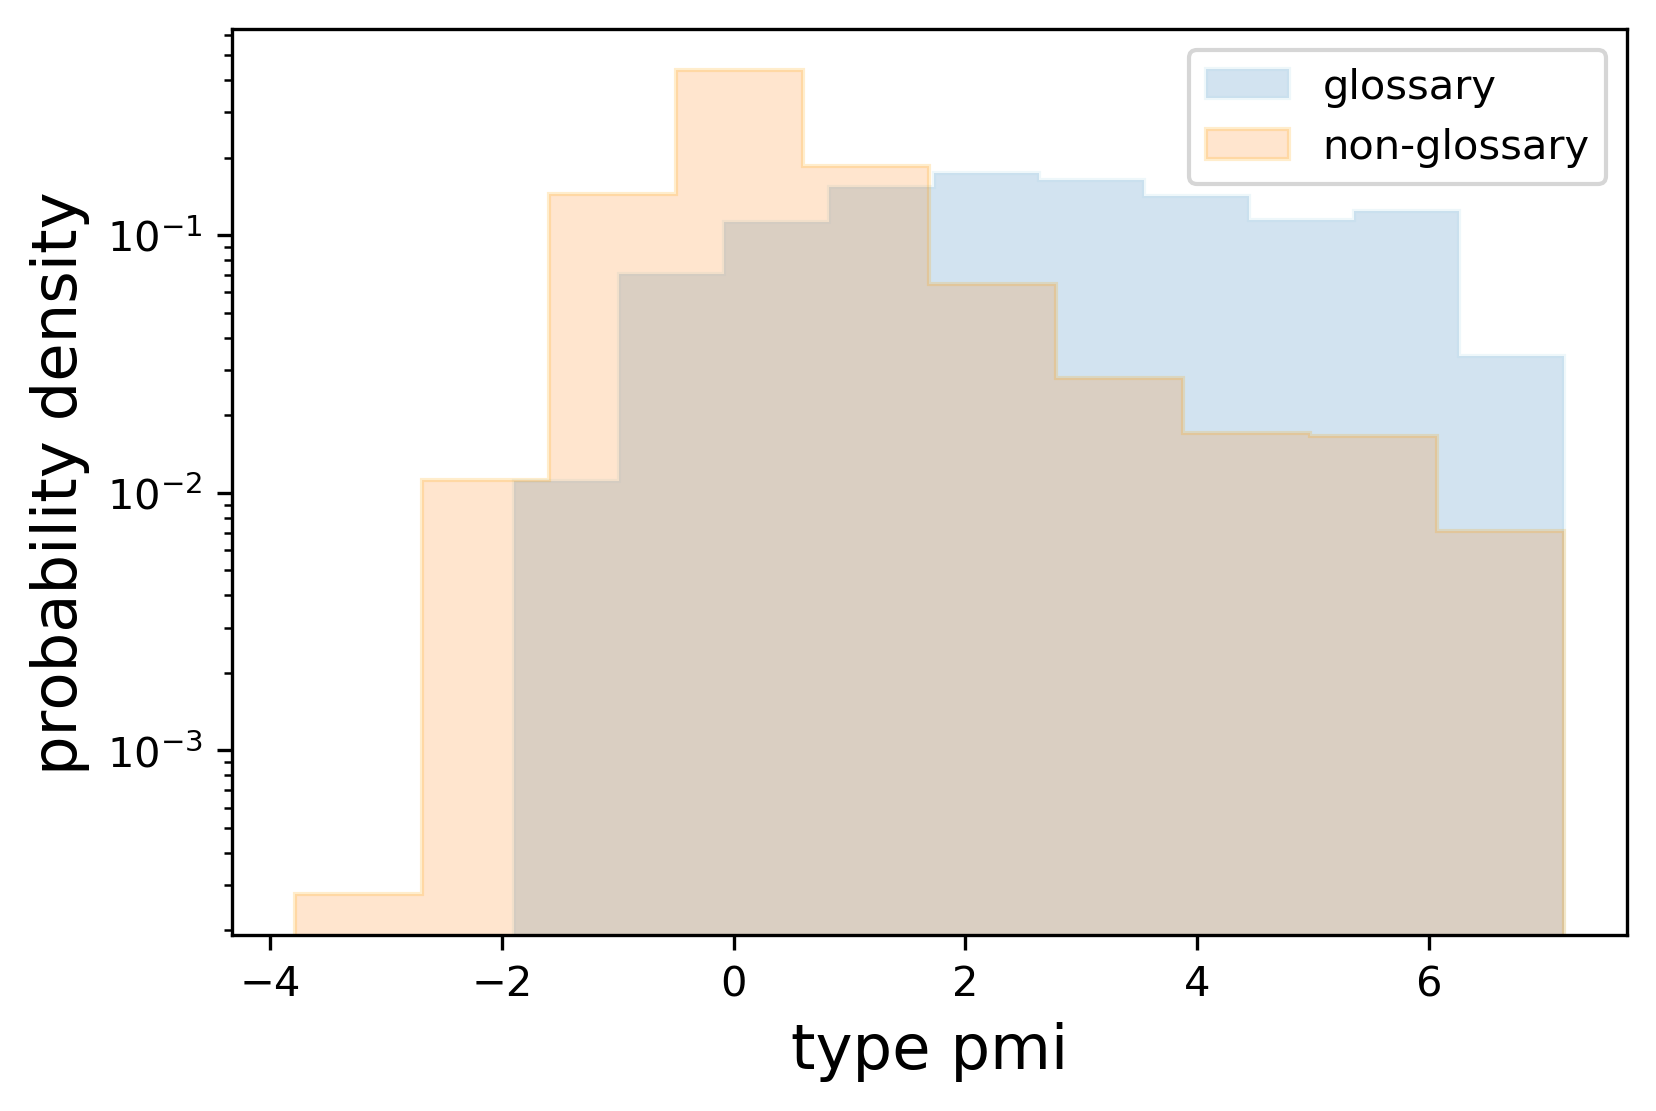

In [62]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)

print(len(gloss_vals))
print(len(not_gloss_vals))

plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('probability density', fontsize=15)
plt.xlabel('type pmi', fontsize=15)
plt.legend()

print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

In [63]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms and score < 0.05 and int(row['count']) > 100: 
                print(subreddit, w, score)
            #elif w not in gloss_terms and score > 0.85 and int(row['count']) > 100: 
            #    print(subreddit, w, score)

 11%|█         | 53/474 [00:00<00:01, 214.41it/s]

aquariums tbh -0.2905498403630227
aquariums imo -0.17780007645732757
askgaybros sub -0.29530515782475364
asoiaf subreddit -1.0915961393465712
asoiaf op -0.7949646829969779
asoiaf lol -0.47447671324461604
asoiaf so -0.005748123408464535
boxoffice for -0.39771981607065415
boxoffice am -0.37310504731282074
cats quick -0.32804615243083535
childfree so 0.002536651076899888


 29%|██▊       | 136/474 [00:00<00:01, 225.87it/s]

churning y -0.009402576056636113
clashroyale control -0.12902033945379635
competitiveoverwatch stick -0.15938996167149058
competitiveoverwatch control -0.018473295531109785
datingoverthirty so -0.28506314078552036
deadbydaylight is -0.1864920938064696
dnd sad -1.159013359871753
dnd mad -0.13702847076239175
dota2 b -0.2547516232434246
dota2 p -0.09130484760340599
dota2 back -0.013653026022891328
elderscrollsonline hot -0.7553906454889251
elderscrollsonline c -0.6274730014836455
elderscrollsonline drink -0.42431750908064503
elderscrollsonline tell -0.3479220047944088
elderscrollsonline war -0.33951587705339675
elderscrollsonline op -0.06330968005348456
elderscrollsonline so -0.04218877710628765
exmormon imo -0.6541672298602986
exmormon fair -0.05995946922589513
exmormon by -0.0016699654739106883


 44%|████▍     | 210/474 [00:00<00:01, 224.53it/s]

fifa if 0.010210272164226701
fireemblemheroes r -0.7048580739843106
fireemblemheroes is -0.32232014867072334
future_fight if -0.30416526224152596
future_fight he -0.24174053427306197
hearthstone pain -0.23034087368394834
hearthstone out -0.14423143541058978
justnomil f -0.5718392214032035
justnomil so -0.11030330385971601

 73%|███████▎  | 344/474 [00:01<00:00, 330.98it/s]


ps4 btw -0.33330605035693583
purplepilldebate so -0.9200236405171468


 95%|█████████▍| 449/474 [00:01<00:00, 381.80it/s]

skincareaddiction he -1.6406332727888795
skincareaddiction pc -0.8253695684219915
skincareaddiction to -0.08224424135036393
thedivision hot -1.0537242079647602
thedivision class -0.3665629977586232
thedivision epic -0.17889088240669557
thedivision pull -0.15652049486299607
wow hot -0.7269374281943174
wow c -0.4890907967601963


100%|██████████| 474/474 [00:01<00:00, 340.08it/s]

wow b -0.4472481003151234
wow g -0.35780627561192874
wow s -0.173426909788599
wow m -0.06799723030799784
wow if -0.006477415470900067


In [85]:
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    type_pmi_dict = {}
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            type_pmi_dict[w] = score
    base_pmi_dict = {}
    with open(BASE_SENSE_PMI_DIR + subreddit + '.csv', 'r') as infile: 
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            if w not in gloss_terms: continue
            score = float(row['most_pmi'])
            base_pmi_dict[w] = score
    ag_pmi_dict = {}
    with open(AG_SENSE_PMI_DIR + subreddit + '.csv', 'r') as infile: 
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['most_pmi'])
            ag_pmi_dict[w] = score
    for w in base_pmi_dict: 
        if (ag_pmi_dict[w] < 2.5): 
            print(subreddit, w, ag_pmi_dict[w], base_pmi_dict[w], type_pmi_dict[w])

  3%|▎         | 15/474 [00:00<00:04, 106.20it/s]

afl ladder 2.2761534975927504 3.4493035776886622 2.5680354196340223
afl spoil 1.5929974239581708 3.374404478018058 1.7790825340935814
afl ball 2.468268509771093 2.971192646395463 2.2743894020785373
afl forward 1.7861333854503492 2.5428125453396215 1.7072608578678061
afl percentage 1.1618570969803323 2.2381394692343437 1.3233904192411017
afl ground 1.8181138143975015 1.9039976404920242 1.563901288740904
afl rounds 1.8884047877550336 1.7305505235387335 1.4380533275612417
afl behind 0.8157287252182402 1.020399843150019 0.7221157588598128
afl list 0.8632552182344946 0.9799555863443192 0.7837655804418735
afl back 0.2918481419126967 0.4717557295197079 0.29935529782309594
airforce tis 2.2926108071124123 4.270846329297759 2.4982621294889147
airforce sf 2.303605167378019 2.7693214272034985 2.4178340864672956
airforce les 2.1160713910512414 2.755719662457929 2.1161039525810557
airforce ig 1.6689857637917058 1.8297437313919196 1.6585232859913357
airforce ad 1.6458636276442768 1.5174865129459112 1

  8%|▊         | 39/474 [00:00<00:04, 102.14it/s]

askgaybros lgbtq 2.3263182291337476 2.2633413942693466 2.3550261529706153
askgaybros bottom 1.1323711696176335 2.1311766952986257 1.170332638143829
askgaybros versatile 0.8920683288578721 1.9519109728959938 0.9228947999800035
askgaybros ally 0.9596294480429204 1.7701862528849006 0.8849254384757945
askgaybros trans 1.565896731399361 1.506917277483687 1.5570198990874233
askgaybros transgender 1.4374842543723974 1.4679832555561159 1.4555333691333785
askgaybros bear 0.8885779239181039 0.9978470815642115 0.7337961823924687
askgaybros top 0.2519784811935714 0.5644240057909801 0.1947983157618209
askgaybros sub -0.32882347563732517 -0.41830321684272315 -0.29530515782475364
asoiaf got 0.1680365441973817 0.6942858810260191 0.10953887194392954
asoiaf aa 0.2644464899184432 0.3504039367546387 0.1511030030331343
asoiaf iirc 0.4832605534145905 0.3291828721201155 0.4038331057963789
asoiaf imo 0.3055964675505084 0.25298858928539547 0.24491064113044758
asoiaf so -0.021930987916230296 0.049050956583827 -

 19%|█▉        | 89/474 [00:00<00:02, 129.94it/s]

boxoffice os 2.2006811211372512 3.01179785635943 2.2083234887439755
boxoffice bop 2.1313779766664998 2.7602352867978097 1.9816823165346762
boxoffice cm 2.448296048042511 2.690418876666138 2.42285865468662
boxoffice legs 2.0861537095551856 2.616620877370314 2.091843540061439
boxoffice bomb 1.7741240425824405 2.3446961732195497 1.781251139131044
boxoffice international 1.995771435728322 1.886694343560594 2.006657997762504
boxoffice foreign 1.5582008362632584 1.6528822182584373 1.3828734522457224
boxoffice int 1.5189287739097297 1.4328889121307944 1.5007204195437711
boxoffice bot 0.41233456388637174 0.9729236051818744 0.2969371949538508
boxoffice br 1.1218342555921534 0.9524117860124776 1.0588530495310526
boxoffice pr 0.611691630259785 0.6180369586506325 0.5397458586834891
boxoffice row 0.6030279815998838 0.6089223343586323 0.512566510356595
boxoffice for -0.3918621271178956 -0.33429549064250863 -0.39771981607065415
boxoffice am -0.3994865016289348 -0.5262032034262947 -0.37310504731282074

 22%|██▏       | 102/474 [00:00<00:03, 105.32it/s]

christianity tradition 1.974013860067191 2.7190497375391636 2.2976838949916965
christianity angel 1.6298212446714453 2.2503258339794483 1.5122948865733998
christianity priest 2.3978423468879813 1.958139437719059 2.3498939507672767
christianity bigotry 1.7873889077131833 1.7746313256826807 1.7499093880387042
christianity discrimination 1.222910227106113 1.2692158935368485 1.2309056673710783
christianity conservative 1.076544693984337 1.1244531792029335 0.9933864768085517
christianity tolerance 1.232004036141576 1.1207252502022618 0.3601006005949927
christianity christmas 0.18888319658853567 0.22753442454061834 0.17119566484293802
churning mr 2.365898218842493 2.9053744707700524 2.4283284430367598
churning ge 2.394488538295774 2.616688766711128 2.3518152923312616
churning sc 1.8854227194817792 2.547314338040449 1.9104590077033983
churning fr 1.6493490681901757 2.320350384670376 1.7457163746782323
churning 2x 2.2900552747267846 2.2451187615685044 2.302411668160484
churning ft 1.2132664254

 29%|██▉       | 139/474 [00:01<00:03, 108.52it/s]

datingoverthirty fb 1.2228936265283183 1.0206175749129054 1.246456554565358
datingoverthirty old 0.5755902803504174 0.7943346077993869 0.4998106426891481
datingoverthirty af 0.2299219866908667 0.21279522575933185 0.13319309829466539
datingoverthirty so -0.24295045004601723 -0.3034202543395143 -0.28506314078552036
deadbydaylight ruin 2.215333488327302 3.3377775858592633 2.5229053059834805
deadbydaylight gg 2.289346362768052 2.6761222541405147 2.306869852145514
deadbydaylight los 0.6801874292728515 2.000052867740487 1.1637783402013306
deadbydaylight farming 1.6208859835647826 1.8458071927607038 1.639304713002952
deadbydaylight meta 1.6070139625784872 1.7000011358127551 1.5856800173485086
deadbydaylight mom 0.8698698257273147 1.6720260042308464 0.8848322742699981
deadbydaylight stack 1.4333609683806752 1.4707163561347676 1.4654670505408067
deadbydaylight legacy 1.1698914183169928 1.1959017113250454 0.8623755409817642
deadbydaylight bs 0.4603387738554942 0.3430215625180914 0.52830830095606

 35%|███▌      | 167/474 [00:01<00:02, 115.36it/s]

elderscrollsonline leash 1.759007916292932 2.888290875238547 1.7833557201651165
elderscrollsonline hm 1.6790507881345966 2.8841687114571903 1.7633540680896946
elderscrollsonline pots 2.19288499884467 2.538212420897868 2.2126448505560026
elderscrollsonline gear 2.4892536807799135 2.4912464933044207 2.30387111114275
elderscrollsonline dot 2.2867839383271824 2.4431679404620485 2.0500177317591546
elderscrollsonline eu 1.8934349268714623 2.337210996928869 1.9693323562738103
elderscrollsonline npc 2.3486449424192384 2.3073047888544838 2.11245955806231
elderscrollsonline squishy 2.2290340455105433 2.2550789854321773 2.0957863544398108
elderscrollsonline ap 1.8264559421213762 2.2261297290578126 1.8350485208823084
elderscrollsonline lag 2.2118312419882598 2.215289561812069 2.1569382015350254
elderscrollsonline build 1.1650966666118319 2.099015952919193 1.3877313602902297
elderscrollsonline flame 1.9443641378917713 2.010155523782245 1.84788580501145
elderscrollsonline ep 2.271845806037883 2.0093

 39%|███▉      | 185/474 [00:01<00:02, 124.42it/s]

fireemblemheroes hm 2.425515879065518 3.4364822032185502 2.383596976471903
fireemblemheroes sp 2.490590250597245 2.5050316427601915 2.438717495086956
fireemblemheroes aa 2.0462232973487917 2.3736981899343976 1.9574273403842612
fireemblemheroes b 1.7758828596833232 2.2820830782701047 1.6835846776237744
fireemblemheroes cc 1.9020130780773827 1.8747894225305815 1.8397302571647873
fireemblemheroes fb 1.1717950154409782 1.3170790173113216 1.1156983365856137
fireemblemheroes g 0.33182023421898366 0.06323917457208908 0.16820217177887503
fireemblemheroes r -0.6645853039804198 -0.16614013443464462 -0.7048580739843106
fireemblemheroes is -0.2860984163256976 -0.2158433794889192 -0.32232014867072334
fitness tm 1.7707924032949545 2.425408857098668 1.7811600272734038
fitness ppl 2.288960549670161 2.358276857769279 2.321222924193254
fitness cutting 2.028122692488098 2.211760101213826 2.009618415617414
fitness plate 2.1213054923432337 1.8578174824691902 1.45095450611412
fitness 5k 1.3509810906027657 1

 51%|█████     | 242/474 [00:01<00:01, 129.60it/s]

gendercritical woman 1.7887794175601055 2.610478658782385 1.7914506813791697
gendercritical sex 1.6254977055516997 2.078437944390788 1.727379350802303
gendercritical man 0.75767875917896 1.185349498199226 0.19833618851745302
gendercritical sjw 0.9784523146198734 1.1418838946770016 0.978937542594951
hearthstone constructed 1.9482062105823261 3.783647543039407 2.3845299034634535
hearthstone rag 2.4374627291226147 3.6789563948133086 2.642913417378394
hearthstone giant 1.4414164246217283 3.188095344139531 1.4173851192198677
hearthstone nova 2.2196416059307853 3.0060062933012097 1.9290987470907623
hearthstone toast 1.9295852206994364 2.9606535154964995 2.0876867343848997
hearthstone curve 1.9628446411727463 2.842115884860096 2.016299550709784
hearthstone si 1.6268138464290307 2.719872822696183 1.6466517811177477
hearthstone echo 2.2437756478672726 2.670074696488426 2.2504673963881165
hearthstone miracle 1.8343472354427885 2.623938166147138 1.8858781266788294
hearthstone portal 1.89746941045

 68%|██████▊   | 324/474 [00:02<00:00, 178.13it/s]

leagueoflegends mid 2.32411370497214 2.627478707154307 2.3025891205688915
leagueoflegends cc 2.4057336007388317 2.5402233856615086 2.3969263512587418
leagueoflegends sr 1.72999749678461 1.9983744545409292 1.6976052017624093
leagueoflegends ad 2.0728114139691747 1.8829271431259904 1.528778626209601
leagueoflegends top 1.1669277464156766 1.8093062514692875 1.1520607657409938
leagueoflegends er 0.7161266320352508 0.3968488183053183 0.047041948250368414
leagueoflegends or 0.16257294908642153 0.20314519890137475 0.13273613045068672
mechanicalkeyboards click 1.409959330142535 2.1092120195364896 1.3444901779648022
mechanicalkeyboards sp 1.6823106466054374 1.9200575330403233 1.6707544955284295
mechanicalkeyboards travel 1.2378448692488777 1.4685499642251578 0.8227607721010255
motorcycles lid 1.3293972839066737 1.7589068808298562 1.3333588547857225
motorcycles standard 0.6044263480485185 0.4996756989908879 0.4038488958145872
pathofexile mob 2.3961977357868993 2.578930776672185 2.376884238438142

 74%|███████▎  | 349/474 [00:02<00:00, 155.97it/s]

pokemontrades ft 2.2684606506861664 3.024094697507136 2.222615682067973
pokemontrades pal 2.3164794281211973 2.907900043651593 2.382911070629957
pokemontrades sr 2.0878742605663465 2.718833319888968 2.3841535726007135
pokemontrades hp 2.135013532612824 2.467910902697533 2.0235756292507063
pokemontrades pm 2.4280645937760985 2.4509601673253347 1.9836268001292072
pokemontrades em 1.3383075350788143 2.4304483736807976 1.2604923292904364
pokemontrades competitive 1.9703065059645444 2.2916016085707325 1.9216378078543646
pokemontrades legendary 1.6342688672478742 1.9896432479884898 1.6569861916631605
pokemontrades event 1.9896515379262925 1.9090971705232904 1.746866080567155
pokemontrades spread 1.0505296299395577 1.4872669446759603 0.6863565391107664
pokemontrades perfect 1.0737447411749916 1.3190726118594558 1.1232430422192483
pokemontrades chain 1.0221207566714987 1.1078026817984659 0.7977429445767649
pokemontrades stock 0.7005606726226785 0.7505310387338785 0.47100597872281447
pokemontra

 85%|████████▌ | 403/474 [00:02<00:00, 194.15it/s]

skincareaddiction ha 1.567415818009098 2.9386179075614116 1.5788898752874572
skincareaddiction pie 1.962330742614184 2.6069019088799523 1.8805180984157035
skincareaddiction sa 2.280802833304941 2.3715817829371164 2.2597162518336
skincareaddiction fa 2.111428229779397 2.0499293972061063 1.7027196956844504
skincareaddiction de 1.4931492115325793 1.5599621580102094 1.1430619720408763
skincareaddiction to -0.04642136750324492 0.03926618925359402 -0.08224424135036393
skincareaddiction pc -0.9852048996191611 -0.21096991989989292 -0.8253695684219915
skincareaddiction he -1.6047456468612238 -1.7655910013251621 -1.6406332727888795
starwarsbattlefront devs 2.3067309966388128 2.6147669625608185 2.3114624552921588
starwarsbattlefront st 2.459640764613813 2.5095919490187746 2.294918318651312
starwarsbattlefront sa 2.042402718871648 2.2729911508398786 2.0960338238442775
starwarsbattlefront buff 2.3138947506498515 2.098961923730291 2.2381486452952113
starwarsbattlefront hs 1.3188256083251106 1.592099

 97%|█████████▋| 462/474 [00:02<00:00, 197.14it/s]

thedivision armor 2.338322024666498 2.716480640960482 2.3354388930216325
thedivision build 1.6860333543730681 2.643493027899746 1.9159709309318351
thedivision dc 2.1430454006088873 2.588264739289956 1.618774160854367
thedivision ai 2.0859969490772117 2.577353418661111 1.9725267257814514
thedivision mods 2.1095537687082286 2.5423109722276127 2.1242873332519787
thedivision npc 2.4938726282970625 2.5343149926039494 2.5236401536106254
thedivision boo 1.5116038310277606 2.5306212315572947 1.729077846569734
thedivision farm 2.36747714574432 2.3564212036946706 1.8256062169744522
thedivision sp 2.328703833055442 2.3509449860735474 2.292950032625377
thedivision deploy 1.801162747187934 2.3384250200213352 1.7144132728202781
thedivision drops 2.357929011325239 2.3325509304334497 2.3329800127084734
thedivision mod 1.8877815526624737 2.3139745551550024 1.8381259727909882
thedivision nerf 2.389375358020125 2.270759156601037 2.38892279820996
thedivision rogue 1.7905161494510236 2.247817249015889 1.87

100%|██████████| 474/474 [00:02<00:00, 173.62it/s]

wow wow 1.891125497140858 3.4817454979006817 1.9752068718821725
wow disc 2.0583205756284233 2.9748880157981086 2.0354333325796246
wow cos 1.563256173606578 2.6538888561917893 1.5405096085042325
wow hunter 2.4484508691614484 2.379972351163405 2.345204970426388
wow panda 2.184233500394522 2.373923689430951 2.0741079749853957
wow mob 2.2250035560411154 2.3547461140779475 2.216895240949319
wow heals 1.8340785875167076 2.228191176536358 1.8132516661222624
wow alt 1.625578098084061 2.1351194575831376 1.6161830355601408
wow bop 1.3462889041031538 2.121529022616326 1.2923424101138699
wow cd 1.8690095857482911 1.9280531556110974 1.8494776465462202
wow npc 1.8659821435842805 1.8390964142692015 1.677571635868141
wow org 1.089356087850628 1.7788753564197788 1.2360719684089614
wow mc 1.5016643210511282 1.7705107721504 1.487880100630354
wow ally 1.2890580191932772 1.7580579904130667 1.340784116206749
wow soo 1.5889494178265806 1.7116401369008911 1.1954075133163087
wow dot 1.0424347050534688 1.344905

In [87]:
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    type_pmi_dict = {}
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            type_pmi_dict[w] = score
    base_pmi_dict = {}
    with open(BASE_SENSE_PMI_DIR + subreddit + '.csv', 'r') as infile: 
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['most_pmi'])
            base_pmi_dict[w] = score
    ag_pmi_dict = {}
    with open(AG_SENSE_PMI_DIR + subreddit + '.csv', 'r') as infile: 
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['most_pmi'])
            ag_pmi_dict[w] = score
    for w in base_pmi_dict: 
        if ag_pmi_dict[w] > 5 and base_pmi_dict[w] > 5 and type_pmi_dict[w] < 4: 
            print(subreddit, w, ag_pmi_dict[w], base_pmi_dict[w], type_pmi_dict[w])

  1%|          | 5/474 [00:00<00:22, 21.06it/s]

3dprinting runaway 5.328338154174788 5.642635698504621 2.8097474354479623
3dprinting heights 5.196612584968134 5.004594117776436 2.6866048826706956
40klore fists 5.552759627714207 5.542855676146292 3.686317221817293


  3%|▎         | 12/474 [00:00<00:22, 20.70it/s]

afl saints 5.2752202635427885 5.241384435317363 3.902504712889327


  4%|▎         | 17/474 [00:00<00:23, 19.87it/s]

amd flashback 5.0608199984210955 5.243313184532202 2.0278519726215793
amd lanes 5.134414741406733 5.0525054313653 2.4262735309689942


  5%|▌         | 26/474 [00:01<00:22, 20.11it/s]

aquariums gal 5.1470236591245175 5.423815548710769 3.6821184985631676
aquariums schooling 6.251121737265541 5.123732205503427 3.4394641342433805
army rave 5.5615633504801005 5.006006466440712 3.3905053153216462


  7%|▋         | 33/474 [00:01<00:23, 19.09it/s]

askouija q 6.262782325232017 5.938613000996025 3.6216554374462375
askouija d 5.734158250727565 5.137073904322598 3.0294183004333455


 10%|▉         | 47/474 [00:02<00:21, 20.04it/s]

bangtan vu 5.70677023545709 5.771692753807377 3.3405693475130294


 15%|█▍        | 71/474 [00:03<00:17, 22.57it/s]

boxoffice office 5.358981056522538 5.295219710545509 2.394617030704141


 16%|█▌        | 77/474 [00:03<00:17, 22.62it/s]

buildapc vengeance 5.041394984907294 5.005211496151529 3.358988745335667


 18%|█▊        | 83/474 [00:04<00:19, 20.12it/s]

catholicism teaching 5.12465144476591 5.171892798799734 2.5324991676870066
catholicism mass 5.487112334783821 5.144106821754982 2.4514614850677843
catholicism fathers 5.278589030476139 5.139025458531296 2.4016430891737746
cats sweetie 5.094758271864978 5.1481207996281055 3.248539848648179


 23%|██▎       | 107/474 [00:05<00:15, 23.28it/s]

counting bee 5.897977217045221 8.430529849322674 3.279630099224983
counting threads 5.534664438454438 6.160984610406829 3.4006108337082623
counting eight 5.468169706868602 5.287335884092222 3.4950005462008904
crashbandicoot clutch 6.083544279955472 6.460318986965075 2.5165074078944007
crashbandicoot trials 6.182284633402376 6.3274129075839465 3.755528833239104
crashbandicoot stew 5.467583084444615 5.917835684602208 3.171777015722009


 28%|██▊       | 131/474 [00:06<00:15, 21.60it/s]

destinythegame dreaming 5.206157474117392 5.100273945532835 3.0280474807209448


 30%|██▉       | 140/474 [00:06<00:15, 21.54it/s]

dragalialost wounded 6.208789299197705 5.855795688795862 2.70452411125379


 31%|███▏      | 149/474 [00:07<00:14, 21.93it/s]

elitedangerous scoop 5.935033514684306 5.951670645512645 3.8403626189589835


 33%|███▎      | 155/474 [00:07<00:16, 19.37it/s]

eurovision contest 6.107365149238313 5.204935388047477 3.648791670384289
exmormon saints 5.3767981924909165 5.281295239333443 3.1389862407940963
exmormon smith 5.681189975917735 5.280079989472365 2.979892962975354


 34%|███▍      | 161/474 [00:07<00:14, 21.91it/s]

fakecollegefootball toss 5.180038035673131 5.0598892169416425 2.9675547434004144
fallout lookout 5.785310860720509 5.757118212010345 3.2211024107613584
fantasy kay 5.008637006772859 5.662025231607896 3.5079947297873844
fantasy butcher 5.179550756998803 5.408429268618682 3.0472818922355134
fantasy archive 5.336588915002608 5.386574214642035 3.7623634006728306
fantasy archives 5.288581001545591 5.308828552045489 3.373333808454048
fantasybaseball whip 6.2153940407735515 5.746493602516642 3.5057465654693076
fantasybaseball steals 5.4632284400763345 5.5463877192694495 3.81120348899324
fantasybaseball wil 5.404701100629044 5.080706975357387 3.5511219515068655


 38%|███▊      | 179/474 [00:08<00:11, 24.89it/s]

formula1 bull 5.346473072926087 5.298973102318946 3.527328419442682


 40%|███▉      | 188/474 [00:08<00:12, 22.34it/s]

future_fight advancement 6.257970419689133 6.327048956977222 3.822122514562941
future_fight grey 5.184019667198036 5.386961026836606 2.464327984532147


 42%|████▏     | 200/474 [00:09<00:12, 21.19it/s]

globaloffensive vi 5.48665498304562 5.604378667386945 3.04671567436097
godzilla rim 5.336692172169181 5.346922225093602 3.2925339919113634
golf holes 5.829090793576556 5.414392565244274 2.9719311635188217


 44%|████▍     | 209/474 [00:09<00:11, 23.03it/s]

gunners chambers 5.290977678640964 5.070438088079905 3.8003636083131567
hiphopheads staples 5.293182926351865 5.498421114893258 2.559140847041227


 45%|████▌     | 215/474 [00:10<00:11, 22.57it/s]

homeimprovement siding 5.204664433964214 5.258207629461991 3.9746714033585366
horror massacre 5.6041836203758155 5.589428558534939 3.3837978511047098
horror 13th 5.537152762610392 5.406328488661571 3.702410533881944
horror shining 5.225735961852631 5.026231548882485 3.58185871035411
houseplants mist 5.151755943044443 5.03157895276218 3.658848110050064


 49%|████▊     | 230/474 [00:10<00:12, 19.88it/s]

india hum 5.366224559938661 5.334116436297638 3.2657846666973755
india tha 5.090199090741436 5.296376108314791 3.023175516525119
indiaspeaks tha 5.721637886138154 5.852071592731732 3.542810149157338
indiaspeaks hum 5.643285795942526 5.503364818442176 3.5798408803713726


 52%|█████▏    | 245/474 [00:11<00:11, 20.54it/s]

keto adapted 5.798267078837452 5.741861062114397 3.1385945925949112
kpop hee 5.64586332778186 5.642738473165087 3.555158373073653


 53%|█████▎    | 251/474 [00:11<00:11, 20.26it/s]

lakers kicker 6.051938545288269 5.187425714715139 3.6214611465417796
libertarian nap 5.470035536356887 5.2135952337031695 2.6912885666887787


 55%|█████▍    | 260/474 [00:12<00:10, 20.94it/s]

losangeles lax 5.071607643461889 5.130450923146748 3.7737100508864065
loveislandtv triangle 5.066082859874722 5.057820311189111 3.0770341110558848


 56%|█████▌    | 266/474 [00:12<00:10, 20.36it/s]

magicarena pierce 5.59412763882797 5.455505834705347 2.94935286540194


 58%|█████▊    | 273/474 [00:12<00:08, 24.86it/s]

massivecock knees 5.128106659740177 5.427287902386105 3.8421040949889225
memeeconomy firm 7.069801802071181 5.397197283600465 3.850480055948423


 59%|█████▉    | 282/474 [00:13<00:08, 22.84it/s]

microgrowery gal 5.025089424758972 5.1153878932882435 3.459793556459086


 61%|██████▏   | 291/474 [00:13<00:08, 22.83it/s]

mortalkombat injustice 5.450040920955128 5.3947253920923055 3.836521888273128
motorcycles injected 5.156825013874718 5.146372357194463 2.3490191465036574


 63%|██████▎   | 297/474 [00:13<00:08, 21.81it/s]

nascar petty 6.372960557264216 5.538421031089152 2.425362659385001


 65%|██████▍   | 306/474 [00:14<00:07, 21.25it/s]

nfl bowls 5.395927653317912 5.688692956107381 3.3755662374862885
nfl saints 5.274940776287636 5.313172877679145 3.861818514276754
nfl receiver 5.296381107525505 5.2464963886155065 3.69594812955878
nintendoswitch mansion 5.211567353347684 5.003011031417121 3.53520763934775


 66%|██████▌   | 313/474 [00:14<00:07, 22.88it/s]

nrl eighth 6.9222981547114 6.220281881923978 3.2200973098310004
nyyankees header 5.047025705880164 5.057477638055024 3.0045828126806016
oculusquest scramble 5.361424354342189 5.984295371132025 3.664160714131114


 68%|██████▊   | 322/474 [00:14<00:06, 21.97it/s]

onepiece bark 6.04092404181517 6.0153961833801555 3.5252153697505286


 70%|███████   | 334/474 [00:15<00:05, 24.24it/s]

pokemon freak 5.391978875323031 5.4633228531047875 3.327995216330094
pokemongo genie 5.312745860522679 5.896658413291966 3.5337312282056255


 72%|███████▏  | 340/474 [00:15<00:06, 21.67it/s]

popheads heap 5.661376207300197 5.657613016206032 2.0862668813907654
programmerhumor languages 5.15910071484244 5.095786808155011 3.372493188802104


 76%|███████▌  | 358/474 [00:16<00:04, 23.44it/s]

repsneakers sole 5.572938243155244 5.560748424886296 3.5737862958196547


 77%|███████▋  | 364/474 [00:16<00:05, 21.65it/s]

rupaulsdragrace sync 6.103536207272606 6.220275093377844 3.9283626551962274


 78%|███████▊  | 370/474 [00:17<00:04, 22.01it/s]

sekiro saint 5.760708609891879 5.852522176725413 3.6442681429240156
shitpostcrusaders dignity 5.746702831556269 5.904212293596898 3.939852247700891


 82%|████████▏ | 391/474 [00:18<00:03, 22.38it/s]

starcitizen citizen 5.5564098232581856 5.4739134113138785 3.499760407578786


 86%|████████▌ | 407/474 [00:18<00:02, 23.25it/s]

television patrol 5.129778054313564 5.123609313085175 2.544814392238077
tf2 fortress 5.0134124704084435 5.152408472989059 3.9105398365901016


 87%|████████▋ | 413/474 [00:19<00:02, 22.50it/s]

thanosdidnothingwrong utc 5.5070850978692985 5.047109041693067 3.797823167243515


 88%|████████▊ | 419/474 [00:19<00:02, 22.13it/s]

therewasanattempt eagle 5.414371755093954 5.464482473404147 3.364396056417004


 90%|█████████ | 428/474 [00:19<00:02, 20.19it/s]

totalwar du 5.8303170755423945 5.852181133940554 3.1616192051165295
totalwar pi 5.8901941136213365 5.845936275709368 2.35226129578776
totalwar ce 5.901485999251963 5.787743219354671 3.135359912990165
totalwar dun 5.806592893393383 5.771122338118631 3.254561449078119
transcribersofreddit done 6.814288465182339 6.150685008104813 2.1156077945544793
transcribersofreddit claim 9.11093948162329 5.483393038852802 3.5473938891986716
transcribersofreddit stitch 6.032590697157666 5.053445403248675 1.638649019223823


 94%|█████████▍| 445/474 [00:20<00:01, 18.39it/s]

valveindex persistence 5.72547946600434 5.683142725551917 3.727163360400805
valveindex stations 5.439623185137086 5.62288353403372 3.3697456094076017


 95%|█████████▌| 451/474 [00:20<00:01, 20.20it/s]

wallstreetbets spreads 5.869679776545323 5.4177830496354105 3.811015351846168
walmart associate 5.668273473405242 5.267205465391137 3.9783643682554968
warhammer40k highlighting 5.956490731308611 5.830049132854982 3.958817864679761
warthunder thunder 5.805807025674432 5.74366150705306 3.8166496626582327


 99%|█████████▉| 469/474 [00:21<00:00, 19.53it/s]

worldofwarships knot 5.814392623493503 5.844791603025668 2.3208424355222492


100%|██████████| 474/474 [00:22<00:00, 21.49it/s]

youseeingthisshit bae 5.929394334933408 6.024718910238763 3.6113928161496887


## Normalized type PMI

In [5]:
NORM_PMI_DIR = LOG_DIR + 'norm_pmi/'

100%|██████████| 474/474 [00:02<00:00, 204.11it/s]


2184
431773
Ttest_indResult(statistic=80.63291806081462, pvalue=0.0)
MannwhitneyuResult(statistic=786424686.0, pvalue=0.0)
0.17928093491511735
0.01306235476173953


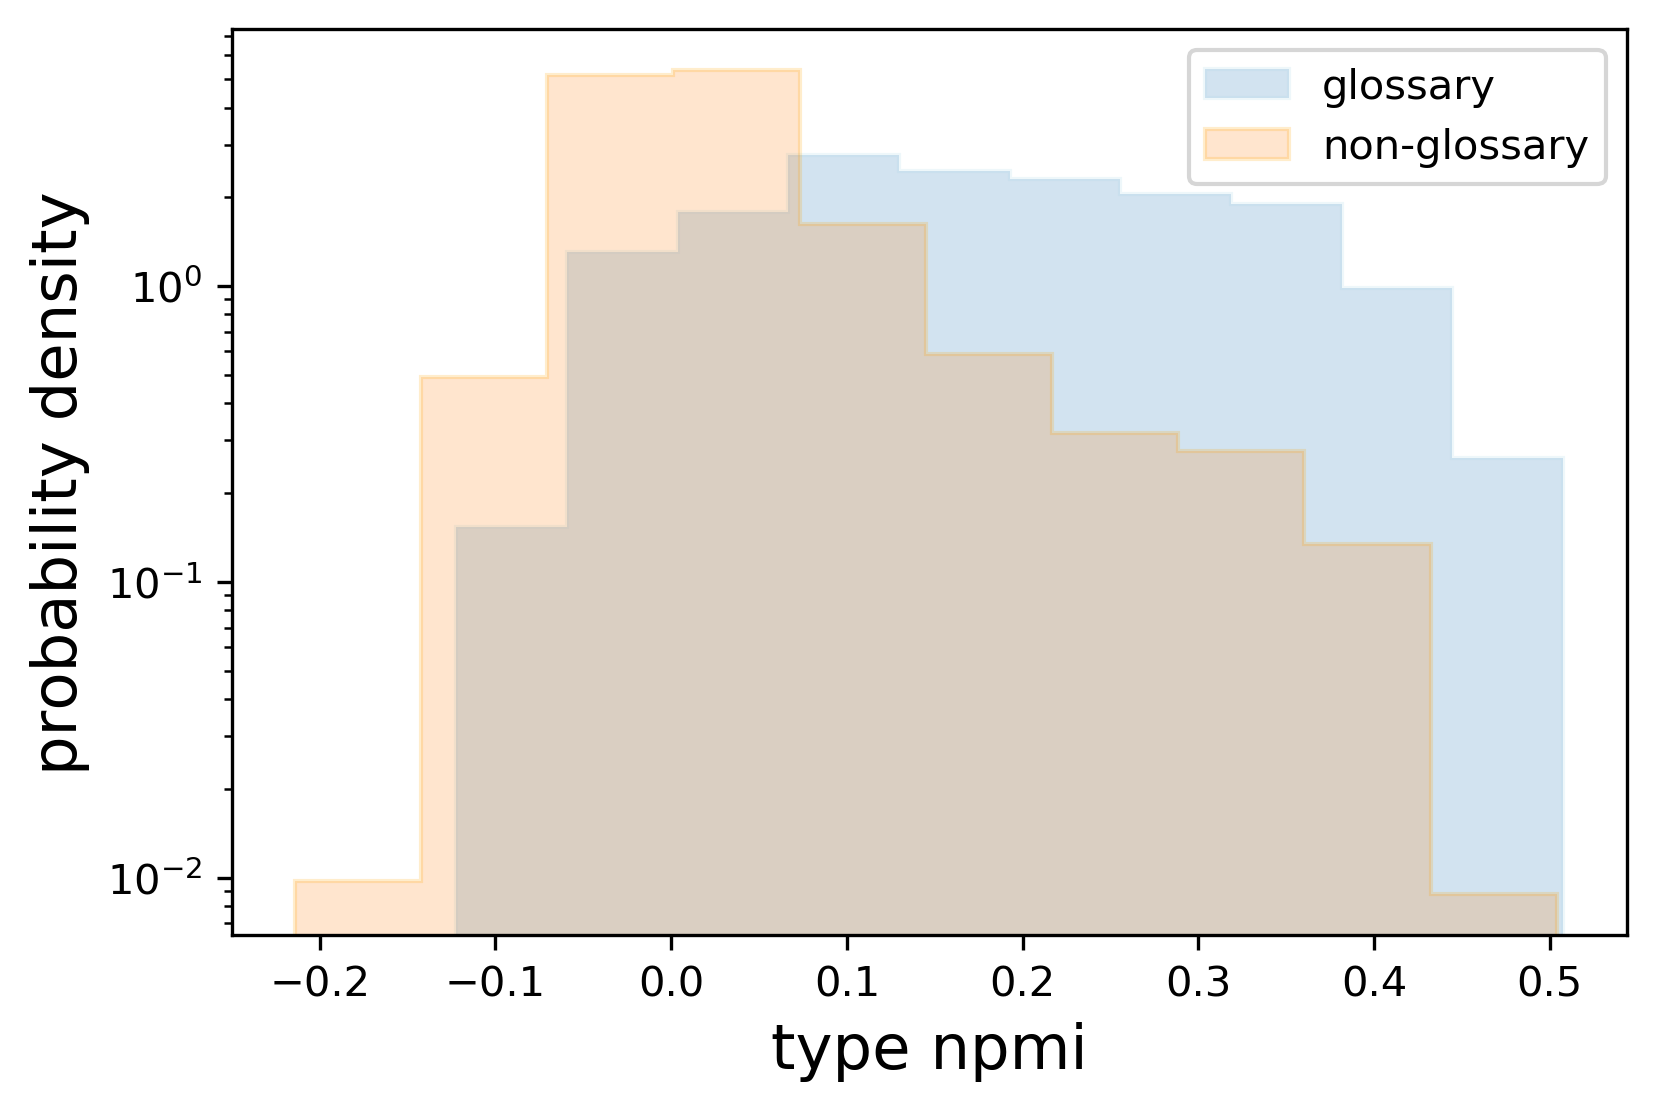

In [6]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(NORM_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(NORM_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)

print(len(gloss_vals))
print(len(not_gloss_vals))

plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('probability density', fontsize=15)
plt.xlabel('type npmi', fontsize=15)
plt.legend()

print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

## TFIDF

In [12]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TFIDF_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TFIDF_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['tfidf'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

100%|██████████| 474/474 [00:02<00:00, 160.40it/s]


0.5682132008017647
0.02367228428702984
MannwhitneyuResult(statistic=710868532.0, pvalue=0.0)


## TextRank

In [4]:
TEXTRANK_DIR = LOG_DIR + 'keywords_textrank/'

In [5]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TEXTRANK_DIR))): 
    subreddit = filename
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TEXTRANK_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['textrank'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

100%|██████████| 474/474 [00:05<00:00, 88.62it/s] 


6.945152007900685e-05
7.900393366467298e-06
MannwhitneyuResult(statistic=3969878435.5, pvalue=0.0)


## JSD

In [31]:
JSD_DIR = LOG_DIR + 'jsd/'

In [32]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(JSD_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(JSD_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['jsd'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

100%|██████████| 474/474 [00:01<00:00, 336.57it/s]


2.017672848991732e-05
2.444617490770639e-07
MannwhitneyuResult(statistic=788597582.0, pvalue=0.0)


## Top 1/2 and 1/4 cutoffs

In [10]:
ROOT = '/mnt/data0/lucy/ingroup_lang/'
LOG_DIR = ROOT + 'logs/' 
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_most_sense_pmi/'
AG_SENSE_PMI_DIR = LOG_DIR + 'ag_most_sense_pmi/'
TYPE_PMI_DIR = LOG_DIR + 'pmi/'
TFIDF_DIR = LOG_DIR + 'tfidf/'

In [11]:
def get_medians(path, metric): 
    print(metric)
    vals = []
    for filename in tqdm.tqdm(sorted(os.listdir(path))): 
        subreddit = filename.replace('.csv', '')
        with open(path + filename, 'r') as infile: 
            reader = csv.DictReader(infile)
            for row in reader: 
                w = row['word']
                score = float(row[metric])
                vals.append(score)
    ps = []
    for p in [50, 60, 70, 80, 90, 98, 99]: 
        ps.append(np.percentile(vals, p))
    print(ps)
    return np.percentile(vals, 50), np.percentile(vals, 98)

In [14]:
sense_m, sense_t = get_medians(AG_SENSE_PMI_DIR, 'most_pmi')
base_m, base_t = get_medians(BASE_SENSE_PMI_DIR, 'most_pmi')
type_m, type_t = get_medians(TYPE_PMI_DIR, 'pmi')
tfidf_m, tfidf_t = get_medians(TFIDF_DIR, 'tfidf')
norm_type_m, norm_type_t = get_medians(NORM_PMI_DIR, 'pmi')

  2%|▏         | 9/474 [00:00<00:05, 81.24it/s]

most_pmi


100%|██████████| 474/474 [00:04<00:00, 100.01it/s]


[0.009654932101384758, 0.021152171124516096, 0.03564529128783569, 0.05615254549910572, 0.09092811200792808, 0.1744524242466855, 0.21302916404524658]


  2%|▏         | 8/474 [00:00<00:06, 77.36it/s]

most_pmi


  0%|          | 0/474 [00:00<?, ?it/s]

[0.0172226043675457, 0.029333511361664382, 0.04439566287200495, 0.06524046644385789, 0.10001508696572367, 0.17994827737953864, 0.2144383944959922]
pmi


100%|██████████| 474/474 [00:10<00:00, 44.69it/s]


[0.14368642975619209, 0.3675468465645889, 0.6636654082573912, 1.110993113597629, 2.016327239070056, 5.006313171329149, 5.882297269019653]


  1%|          | 3/474 [00:00<00:16, 28.30it/s]

tfidf


100%|██████████| 474/474 [00:10<00:00, 44.68it/s]


[0.023602200307241316, 0.03866249375155715, 0.07506182094868809, 0.17762468763824268, 0.5371191533753051, 3.0837233757223963, 4.406706245604466]


  1%|          | 4/474 [00:00<00:13, 34.41it/s]

pmi


100%|██████████| 474/474 [00:10<00:00, 44.90it/s]


[0.008950423272301661, 0.02261513150464957, 0.04037423905310003, 0.06720029386461164, 0.12191657724645635, 0.3034868476499491, 0.3517743621999161]


In [33]:
tr_type_m, tr_type_t = get_medians(TEXTRANK_DIR, 'textrank')
jsd_type_m, jsd_type_t = get_medians(JSD_DIR, 'jsd')

  1%|          | 4/474 [00:00<00:46, 10.19it/s]

textrank


100%|██████████| 474/474 [00:43<00:00, 10.98it/s]


[8.269129055698814e-06, 1.1765222785504288e-05, 1.744968868751349e-05, 2.6379224715432107e-05, 4.9964954587300724e-05, 0.00023087928571201397, 0.0004074218983116269]


  1%|          | 4/474 [00:00<00:11, 39.51it/s]

jsd


100%|██████████| 474/474 [00:11<00:00, 42.59it/s]


[1.0991249948120378e-07, 6.213319441631245e-07, 1.723080427434484e-06, 3.994407151955482e-06, 1.0186509028879808e-05, 5.5988101507527014e-05, 0.00010139390061467894]


In [15]:
def get_glossary_percentage(cutoff, path, metric): 
    '''
    Gets the percentage of glossary words in the cutoff percentile
    '''
    total_count = 0
    recall_count = 0
    recall_set = set()
    for filename in tqdm.tqdm(sorted(os.listdir(path))): 
        subreddit = filename.replace('.csv', '').replace('_0.2', '')
        if subreddit not in sr2terms: continue
        gloss_terms = set(sr2terms[subreddit])
        with open(path + filename, 'r') as infile: 
            reader = csv.DictReader(infile)
            for row in reader: 
                w = row['word'] 
                score = float(row[metric])
                if w in gloss_terms: 
                    if score >= cutoff: 
                        recall_count += 1
                        recall_set.add((subreddit, w))
                    total_count += 1
    return recall_count / total_count, recall_set

In [16]:
percent, ag_sense_set = get_glossary_percentage(sense_t, AG_SENSE_PMI_DIR, 'most_pmi')
print(percent)
percent, base_sense_set, = get_glossary_percentage(base_t, BASE_SENSE_PMI_DIR, 'most_pmi')
print(percent)
percent, _ = get_glossary_percentage(type_t, TYPE_PMI_DIR, 'pmi')
print(percent)
percent, _ = get_glossary_percentage(tfidf_t, TFIDF_DIR, 'tfidf')
print(percent)
percent, type_set = get_glossary_percentage(norm_type_t, NORM_PMI_DIR, 'pmi')
print(percent)

 27%|██▋       | 130/474 [00:00<00:00, 622.05it/s]

0.2874845105328377


  5%|▍         | 23/474 [00:00<00:02, 218.57it/s]

0.3073110285006196


 13%|█▎        | 62/474 [00:00<00:01, 247.74it/s]

0.1813186813186813


 13%|█▎        | 62/474 [00:00<00:01, 243.52it/s]

0.16758241758241757


100%|██████████| 474/474 [00:01<00:00, 380.12it/s]

0.222985347985348


In [34]:
percent, _ = get_glossary_percentage(tr_type_t, TEXTRANK_DIR, 'textrank')
print(percent)
percent, _ = get_glossary_percentage(jsd_type_t, JSD_DIR, 'jsd')
print(percent)

  5%|▍         | 23/474 [00:00<00:02, 204.18it/s]

0.24910394265232974


100%|██████████| 474/474 [00:01<00:00, 366.67it/s]

0.2907509157509158


In [22]:
print(base_sense_set & type_set)
print(len(base_sense_set & type_set))
print(ag_sense_set & type_set)
print(len(ag_sense_set & type_set))

{('cats', 'litter'), ('kpop', 'comeback'), ('kpop', 'debut'), ('cars', 'transmission'), ('teenmomogandteenmom2', 'nugget'), ('walmart', 'sm'), ('churning', 'dp'), ('fireemblemheroes', 'res'), ('ps4', 'ps4'), ('antimlm', 'hun'), ('bigbrother', 'bb'), ('future_fight', 'nm'), ('thedivision', 'talents'), ('elderscrollsonline', 'cp'), ('wow', 'mop'), ('raisedbynarcissists', 'nc'), ('justnomil', 'mil'), ('clashroyale', 'hog'), ('starwarsbattlefront', 'ga'), ('future_fight', 'uni'), ('skincareaddiction', 'aha')}
21
{('cats', 'litter'), ('kpop', 'comeback'), ('kpop', 'debut'), ('cars', 'transmission'), ('teenmomogandteenmom2', 'nugget'), ('walmart', 'sm'), ('churning', 'dp'), ('fireemblemheroes', 'res'), ('ps4', 'ps4'), ('antimlm', 'hun'), ('bigbrother', 'bb'), ('future_fight', 'nm'), ('thedivision', 'talents'), ('elderscrollsonline', 'cp'), ('wow', 'mop'), ('raisedbynarcissists', 'nc'), ('justnomil', 'mil'), ('clashroyale', 'hog'), ('starwarsbattlefront', 'ga'), ('future_fight', 'uni'), ('ski

### MWE vs single-token scores

In [21]:
'''
single_vals = []
mwe_vals = []
gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                if len(w.split()) > 1: 
                    mwe_vals.append(score)
                else: 
                    single_vals.append(score)
'''
pass

In [22]:
'''
plt.hist(mwe_vals, label="non-glossary MWEs", alpha=0.2, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(single_vals, label="non-glossary non-MWEs", alpha=0.2, edgecolor='orange', histtype= "stepfilled")
plt.hist(gloss_vals, label="glossary words", alpha=0.2, edgecolor='green', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('type PMI', fontsize=15)
plt.title("all words in subreddits w/ glossaries")
plt.legend()
'''
pass

In [23]:
'''
single_vals = []
mwe_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms: 
                if len(w.split()) > 1: 
                    mwe_vals.append(score)
                else: 
                    single_vals.append(score)
'''
pass

In [24]:
'''
plt.hist(mwe_vals, label="MWE", alpha=0.2, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(single_vals, label="non-MWE", alpha=0.2, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('type PMI', fontsize=15)
plt.title("only glossary words")
plt.legend()
'''
pass

### Mean reciprocal rank

In [29]:
# highest is first
def rank_highest_first(path): 
    inv_ranks = []
    ranks = []
    for filename in tqdm.tqdm(sorted(os.listdir(path))): 
        subreddit = filename.replace('.csv', '')
        if subreddit not in sr2terms: continue
        gloss_terms = set(sr2terms[subreddit])
        with open(path + filename, 'r') as infile: 
            w2score = defaultdict(list)
            reader = csv.DictReader(infile)
            i = 0
            found = False
            for row in reader: 
                i += 1
                w = row['word']
                score = float(row['most_pmi'])
                if w in gloss_terms: 
                    rr = 1/float(i)
                    ranks.append(i)
                    found = True
                    inv_ranks.append(rr)
                    break
            if not found: 
                inv_ranks.append(0)
    print("Number of values:",len(inv_ranks))
    print("Mean reciprocal rank:",np.mean(inv_ranks))
    print("Highest-scored glossary term's median rank:",np.median(ranks))

In [30]:
rank_highest_first(AG_SENSE_PMI_DIR)
rank_highest_first(BASE_SENSE_PMI_DIR)

100%|██████████| 474/474 [00:00<00:00, 15520.88it/s]

Number of values: 57
Mean reciprocal rank: 0.26354697604619703
Highest-scored glossary term's median rank: 10.0
Number of values: 57
Mean reciprocal rank: 0.30672561405499177
Highest-scored glossary term's median rank: 6.0


In [29]:
# lowest is first
def rank_lowest_first(path, metric): 
    """
    The input file is formatted so that the lower values
    are listed in the file first. 
    """
    inv_ranks = []
    ranks = []
    for filename in tqdm.tqdm(sorted(os.listdir(path))):
        subreddit = filename.replace('_0.2.csv', '').replace('.csv', '')
        if subreddit not in sr2terms: continue
        gloss_terms = set(sr2terms[subreddit])
        with open(path + filename, 'r') as infile: 
            w2score = defaultdict(list)
            reader = csv.DictReader(infile)
            i = 0
            top = 0
            last_w = ''
            for row in reader: 
                i += 1
                w = row['word']
                score = float(row[metric])
                if w in gloss_terms: 
                    last_w = w
                    top = i
            if top == 0: 
                inv_ranks.append(0)
            rank = i - top + 1
            inv_ranks.append(1/float(rank))
            ranks.append(rank)
    print("Number of values:", len(inv_ranks))
    print("Mean reciprocal rank:", np.mean(inv_ranks))
    print("Highest-scored glossary term's median rank:", np.median(ranks))

In [19]:
rank_lowest_first(TYPE_PMI_DIR, 'pmi')
rank_lowest_first(TFIDF_DIR, 'tfidf')
rank_lowest_first(NORM_PMI_DIR, 'pmi')

  5%|▍         | 23/474 [00:00<00:02, 201.76it/s]

Number of values: 57
Mean reciprocal rank: 0.09375181423128043
Highest-scored glossary term's median rank: 30.0


  5%|▍         | 23/474 [00:00<00:02, 217.92it/s]

Number of values: 57
Mean reciprocal rank: 0.20604386284948573
Highest-scored glossary term's median rank: 13.0


100%|██████████| 474/474 [00:01<00:00, 356.25it/s]

Number of values: 57
Mean reciprocal rank: 0.48236977318657615
Highest-scored glossary term's median rank: 3.0


In [35]:
rank_lowest_first(TEXTRANK_DIR, 'textrank')
rank_lowest_first(JSD_DIR, 'jsd')

  4%|▍         | 20/474 [00:00<00:02, 179.97it/s]

Number of values: 57
Mean reciprocal rank: 0.06163859582166772
Highest-scored glossary term's median rank: 34.0


100%|██████████| 474/474 [00:01<00:00, 357.46it/s]

Number of values: 57
Mean reciprocal rank: 0.26436259491430264
Highest-scored glossary term's median rank: 7.0


### Words shared across glossaries

In [81]:
type_pmi_dict = defaultdict(dict)
base_pmi_dict = defaultdict(dict)
ag_pmi_dict = defaultdict(dict)
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            if w not in gloss_terms: continue
            score = float(row['pmi'])
            type_pmi_dict[subreddit][w] = score
    with open(BASE_SENSE_PMI_DIR + subreddit + '.csv', 'r') as infile: 
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            if w not in gloss_terms: continue
            score = float(row['most_pmi'])
            base_pmi_dict[subreddit][w] = score
    with open(AG_SENSE_PMI_DIR + subreddit + '.csv', 'r') as infile: 
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            if w not in gloss_terms: continue
            score = float(row['most_pmi'])
            ag_pmi_dict[subreddit][w] = score
term2srs = defaultdict(list)
for sr in sr2terms: 
    exist = set(sr2terms[sr])
    for w in exist: 
        term2srs[w].append(sr)
for w in term2srs: 
    if len(term2srs[w]) > 1: 
        for subreddit in term2srs[w]: 
            if w not in base_pmi_dict[subreddit]: continue
            print(w, subreddit, base_pmi_dict[subreddit][w], ag_pmi_dict[subreddit][w])

100%|██████████| 474/474 [00:02<00:00, 230.83it/s]


back afl 0.4717557295197079 0.2918481419126967
back dota2 -0.0478385481897949 0.049415448656105025
ball afl 2.971192646395463 2.468268509771093
ball cricket 3.0906434824551017 2.8363222142659135
ladder afl 3.4493035776886622 2.2761534975927504
sf airforce 2.7693214272034985 2.303605167378019
sa skincareaddiction 2.3715817829371164 2.280802833304941
sa starwarsbattlefront 2.2729911508398786 2.042402718871648
ad airforce 1.5174865129459112 1.6458636276442768
ad elderscrollsonline 0.8834133228665801 1.2108466772936963
ad leagueoflegends 1.8829271431259904 2.0728114139691747
ig airforce 1.8297437313919196 1.6689857637917058
pt airforce 4.739619730241973 3.962785723035245
pt starwarsbattlefront 2.876211703224929 2.646441310929788
fyi airforce 0.03781821364192733 0.13679448268957609
fyi ps4 0.21669160263637027 -0.06313105261526353
ts airforce 3.008650302938726 2.71503215398055
ts rainbow6 2.267816359705302 1.8416376362382725
led aquariums 2.7001943625009894 2.803592343598534
led ps4 0.831555